In [115]:
# Imports 
import pandas as pd 
import numpy as np 
from sklearn.model_selection  import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns
sns.set_style('darkgrid')

In [116]:
df = pd.read_csv("train_ml_all.csv")

In [117]:
df.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [118]:
y = df['churn']
X = df.drop('churn',axis=1)

In [119]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.1,)

In [120]:
print(X_train.shape)
print(X_val.shape)

(2999, 19)
(334, 19)


In [137]:
np.bincount(y_val)

array([284,  50])

In [121]:
clf =  RandomForestClassifier(n_estimators = 500)
clf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
predictions = clf.predict_proba(X_val)

In [127]:
y_pred = predictions[:,1] > 0.61 # Mudança do threshold.

In [149]:
cm = confusion_matrix(y_val, y_pred)

In [150]:
cm

array([[284,   0],
       [ 22,  28]])

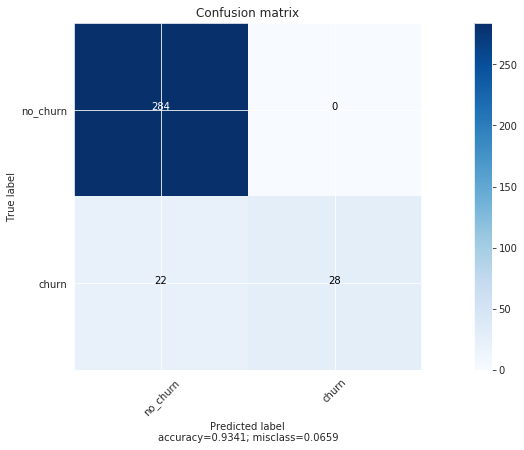

In [148]:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
  
cm = confusion_matrix(y_val, y_pred)
plot_confusion_matrix(cm,
                          ['no_churn','churn'],
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

In [129]:
from sklearn.metrics import classification_report

In [130]:
target_names = ['no_churn', 'churn']
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no_churn       0.93      1.00      0.96       284
       churn       1.00      0.56      0.72        50

    accuracy                           0.93       334
   macro avg       0.96      0.78      0.84       334
weighted avg       0.94      0.93      0.93       334



In [112]:
from sklearn.metrics import recall_score, roc_auc_score ,roc_curve, matthews_corrcoef, f1_score , precision_recall_curve
recall_score(y_val, y_pred)

0.2

In [100]:
roc_auc_score(y_val, predictions[:,1])

0.8677339901477833

In [101]:
matthews_corrcoef(y_val, y_pred)

0.4224470836229533

In [104]:
f1_score(y_val, y_pred)

0.33333333333333337

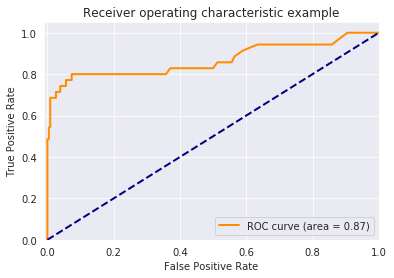

In [111]:
fpr, tpr, thresholds = roc_curve(y_val, predictions[:,1])

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_val, predictions[:,1]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [113]:
precision, recall, thresholds = precision_recall_curve(y_val, predictions[:,1])

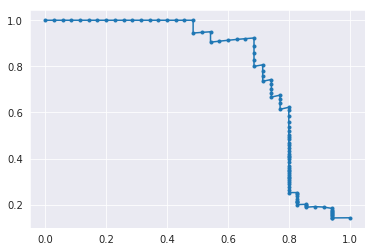

In [114]:
plt.figure()
plt.plot(recall, precision, marker='.')